In [23]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc

In [24]:
def metric_spearman_footrule(y, y_pred, topn, seq=[]):
    if not seq:
        df = pd.DataFrame(zip(y, y_pred), columns=['y', 'y_pred'])
    else:
        df = pd.DataFrame(zip(y, y_pred, seq), columns=['y', 'y_pred', 'seq'])
    df['y_rank'] = df['y'].rank(method='first', ascending=False)
    df['y_pred_rank'] = df['y_pred'].rank(method='first', ascending=False)

    data = sorted(df[['y_rank', 'y_pred_rank']].values.tolist())
    r = []
    for i in range(min(topn, len(y))):
        n = 0
        for j in range(i + 1):
            if data[j][1] <= i + 1:
                n += 1
        r.append(n)
    index = [i+1 for i in range(min(topn, len(y)))]
    return list(zip(index, r))

def plot_auc(ys, preds):
    fpr, tpr, thr = roc_curve(ys, preds)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Plot')
    auc_knn4 = auc(fpr, tpr) * 100
    plt.legend(["AUC {0:.3f}".format(auc_knn4)]);

In [25]:
df = pd.read_csv('../data/peptide/result.csv', index_col=0)
df.head()

,pp,v,label,pred,logit
0,KYNNWKEYWDPQ,6240.0,1,1.0,0.683858
1,YIEIDFKRGIHRN,1707.0,1,1.0,0.636123
2,RWRWDLWEQYFRGN,1701.0,1,1.0,0.685408
3,LHWVNQYREFLD,1402.0,1,1.0,0.544744
4,PWQNLSHRYDRQVGM,1219.0,1,1.0,0.640027


In [26]:
metric_spearman_footrule(df.label, df.logit, 100)[-1], metric_spearman_footrule(df.label, df.logit, 1000)[-1]

((100, 1), (1000, 626))

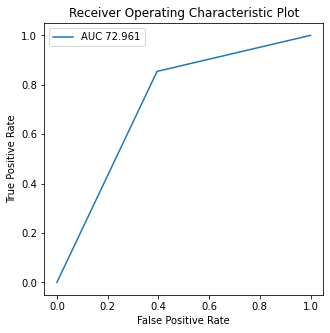

In [27]:
plot_auc(df.label, df.pred)